In [175]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pickle

#### Data used: Breast cancer data from University of California
#### https://archive.ics.uci.edu/ml/datasets.php

In [162]:
columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
           'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
df = pd.read_csv('breast-cancer-wisconsin.data', header=None, names=columns)
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Data exploration:

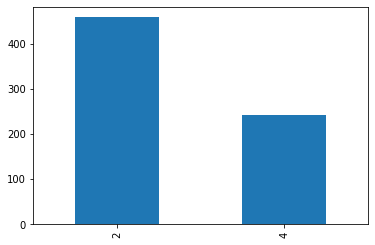

In [163]:
# Check for available no. of classes i.e. labels
df['class'].value_counts().plot(kind='bar');

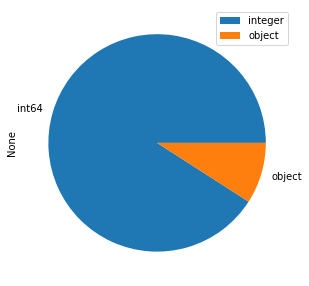

In [164]:
plt.figure(figsize=(5,5))
df.dtypes.value_counts().plot(kind='pie')
plt.legend(['integer', 'object'], loc=1);

In [165]:
df.apply(lambda col: col == '?').sum()

C:\Users\j39\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrom                0
norm_nucleoli              0
mitoses                    0
class                      0
dtype: int64

In [166]:
df.replace('?', -99999, inplace=True)

#### Feature engineering

In [167]:
# id column is not useful for the model predictions, for obvious reasons
# All other columns are features and one column is the class i.e. the label
df.drop('id', axis=1, inplace=True)
df.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


#### SVM Model

In [168]:
X = np.array(df.drop('class', axis=1))
y = np.array(df['class'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [169]:
print(X_train.shape, y_train.shape)

(559, 9) (559,)


In [170]:
clf = svm.LinearSVC()

In [171]:
clf.fit(X_train, y_train)

C:\Users\j39\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [172]:
clf.score(X_test, y_test)

0.9785714285714285

In [173]:
clf.score(X_train, y_train)

0.9677996422182469

#### Pickle the classifier

In [176]:
with open('pickled_classifier', 'wb') as f:
    pickle.dump(clf, f)
with open('pickled_classifier', 'rb') as f:
    pickled_clf = pickle.load(f)

#### Predictions for new data

In [177]:
example_predict = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,1,2,2,3,2,1], [8,7,4,10,7,8,3,2,2]])
prediction = pickled_clf.predict(example_predict)
prediction

array([2, 2, 4], dtype=int64)

#### Verify accuracy of predictions

In [179]:
pickled_clf.score(example_predict, prediction)

1.0